In [1]:
import hashlib
import io
import numpy as np
import pandas as pd
import requests


countries = [
    "ar", "cl", "us", "es", "gb",
    #"us", "gb", "ad", "ar", "at", "au", "be", "bg", "bo", "br", "ca",
    #"ch", "cl", "co", "cr", "cy", "cz", "de", "dk", "do", "ec", "ee", "es",
    #"fi", "fr", "gr", "gt", "hk", "hn", "hu", "id", "ie", "il", "in", "is",
    #"it", "jp", "lt", "lu", "lv", "mc", "mt", "mx", "my", "ni", "nl", "no",
    #"nz", "pa", "pe", "ph", "pl", "pt", "py", "ro", "se", "sg", "sk", "sv",
    #"th", "tr", "tw", "uy", "vn", "za"
]


def get_download_url(country):
    return f"https://spotifycharts.com/regional/{country}/daily/latest/download"


def get_country_df(country):
    country_url = get_download_url(country)
    r = requests.get(country_url)
    csv_binary = r.content.decode("utf-8")
    return pd.read_csv(io.StringIO(csv_binary), header=1, error_bad_lines=False).head(10)


def get_all_countries_tracks_dict():
    countries_dict = {}
    for country in countries:
        try:
            df = pd.read_csv(f'regional-{country}-weekly-latest.csv', header=1)
            tracks = list(df["Track Name"])
            if tracks:
                countries_dict[country] = tracks
        except Exception as E:
            print(E)
            print(f"{country} encoding failure")

    return countries_dict



def get_all_tracks_as_set(countries_dict):
    unique_tracks = set()
    for country in list(countries_dict.keys()):
        unique_tracks.update(countries_dict[country])
    return unique_tracks


def LD(s, t):
    if s == "":
        return len(t)
    if t == "":
        return len(s)
    if s[-8:] == t[-8:]:
        cost = 0
    else:
        cost = 1
       
    res = min([LD(s[:-8], t)+1,
               LD(s, t[:-8])+1, 
               LD(s[:-8], t[:-8]) + cost])

    return res


def encode_set(unique_tracks):
    hash_dict = {}
    for track in unique_tracks:
        hash_dict[track] = str(abs(hash(track)))
    return hash_dict


def get_all_countries_tracks_dict_hashed(countries_dict, all_tracks_encoded_dict):
    countries_dict_hashed = {}
    for country in countries_dict:
        countries_dict_hashed[country] = [all_tracks_encoded_dict[track] for track in countries_dict[country]]
    return countries_dict_hashed


def LD(s, t):
    if s == "":
        return len(t)
    if t == "":
        return len(s)
    if s[-8:] == t[-8:]:
        cost = 0
    else:
        cost = 1
       
    res = min([LD(s[:-8], t)+1,
               LD(s, t[:-8])+1, 
               LD(s[:-8], t[:-8]) + cost])

    return res

def minimumEditDistance(first, second): 
    
    #Creating numpy ndarray( initialized with 0 of dimension of size of both strings
    len_first = int(len(first)/19)
    len_second = int(len(second)/19)
    matrix = np.zeros((len_first+1, len_second+1), dtype=np.int)
    
    
    # Cross relation loop through each character of each string with each other and
    # fill the respective index of matrxi (row,column)
    
    for i in range(len_first+1): 
        for j in range(len_second+1): 
            
            #First doing the boundary value analysis, if first or second string is empty so directly adding insertion cost
            if i == 0:  
                matrix[i][j] = j  
            #Second case
            elif j == 0: 
                matrix[i][j] = i
            else: 
                x = i - 1 + 19 * (i - 1)
                y = i - 1 + 19 * (i - 1 + 1)
                matrix[i][j] = min(matrix[i][j-1] + 1,  
                                   matrix[i-1][j] + 1,   
                                   matrix[i-1][j-1] + 1 if first[x:y] != second[x:y] else matrix[i-1][j-1] + 0)     
                                   # Adjusted the cost accordinly, insertion = 1, deletion=1 and substitution=2
    return matrix[len_first][len_second]  # Returning the final


import scipy.stats as stats

def kt(left, right):
    tau, p_value = stats.kendalltau(left, right)
    return tau



def normalised_kendall_tau_distance(values1, values2):
    """Compute the Kendall tau distance."""
    n = len(values1)
    assert len(values2) == n, "Both lists have to be of equal length"
    i, j = np.meshgrid(np.arange(n), np.arange(n))
    a = np.argsort(values1)
    b = np.argsort(values2)
    ndisordered = np.logical_or(np.logical_and(a[i] < a[j], b[i] > b[j]), np.logical_and(a[i] > a[j], b[i] < b[j])).sum()
    return ndisordered / (n * (n - 1))

def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return float(intersection) / union

def distance_between_arrays(left, right):
    if len(left) != len(right):
        print('Arrays sizes does not match')
    jaccard = jaccard_similarity(left, right)

    return jaccard

In [3]:
countries_dict = get_all_countries_tracks_dict()
for country in countries_dict.keys():
    print(country, countries_dict[country])

ar ['Wow Wow (feat. Becky G)', 'Entre Nosotros', 'Turraka - Remix', 'Como Si No Importara', 'Pepas', 'Mi Debilidad', 'No Me Conocen (Remix) [con DUKI, Rei & Tiago PZK]', 'Qué Más Pues?', 'Turraka (Remix)', 'YaMeFui', '2:50 Remix', 'Miénteme', 'Cúrame', 'Todo De Ti', 'Maldita Foto', 'Volví', 'París', 'Ley de Atracción', 'Yonaguni', 'Mala Mía', 'YO SE QUE TU (feat. Rusherking)', 'Volando - Remix', 'Dejame Tranki', 'AM Remix', 'Nicky Jam: Bzrp Music Sessions, Vol. 41', 'BLUNTED 5 - Remix', 'Prende la Cámara', 'Cazame', 'Tiroteo - Remix', 'Sobrio', 'Mal Acostumbrao (feat. Maria Becerra)', 'Bailando Te Conocí', 'Toa La Vida', 'Pareja Del Año', 'En la Oscuridad', 'Poblado - Remix', 'ALMAS GEMELAS', 'STAY (with Justin Bieber)', 'Loba', 'Matatan', '911 - Remix', 'Fiel - Remix', 'Combi Nueva', 'EL MAKINON', 'Chucky73: Bzrp Music Sessions, Vol. 43', "Beggin'", 'Pistola Remix', 'In Da Getto', 'Malbec', 'La Niña de la Escuela', 'Además de Mí - Remix', 'INDUSTRY BABY (feat. Jack Harlow)', 'Que a Pa

In [4]:

def normalised_kendall_tau_distance(values1, values2):
    """Compute the Kendall tau distance."""
    n = len(values1)
    assert len(values2) == n, "Both lists have to be of equal length"
    i, j = np.meshgrid(np.arange(n), np.arange(n))
    a = np.argsort(values1)
    b = np.argsort(values2)
    ndisordered = np.logical_or(np.logical_and(a[i] < a[j], b[i] > b[j]), np.logical_and(a[i] > a[j], b[i] < b[j])).sum()
    return ndisordered / (n * (n - 1))

In [6]:
corr_data = []
for country1 in list(countries_dict.keys()):
    for country2 in list(countries_dict.keys()):
        d = distance_between_arrays(countries_dict[country1], countries_dict[country2])
        corr_data.append([country1, country2, d])

In [7]:
len(corr_data)

25

In [8]:
corr_data = [[x[0],x[1], x[2]] for x in corr_data]

In [9]:
corr_data

[['ar', 'ar', 1.0],
 ['ar', 'cl', 0.35714285714285715],
 ['ar', 'us', 0.07547169811320754],
 ['ar', 'es', 0.3222591362126246],
 ['ar', 'gb', 0.05555555555555555],
 ['cl', 'ar', 0.35714285714285715],
 ['cl', 'cl', 1.0],
 ['cl', 'us', 0.08401084010840108],
 ['cl', 'es', 0.3711340206185567],
 ['cl', 'gb', 0.0582010582010582],
 ['us', 'ar', 0.07547169811320754],
 ['us', 'cl', 0.08401084010840108],
 ['us', 'us', 1.0],
 ['us', 'es', 0.08423913043478261],
 ['us', 'gb', 0.36054421768707484],
 ['es', 'ar', 0.3222591362126246],
 ['es', 'cl', 0.3711340206185567],
 ['es', 'us', 0.08423913043478261],
 ['es', 'es', 1.0],
 ['es', 'gb', 0.07258064516129033],
 ['gb', 'ar', 0.05555555555555555],
 ['gb', 'cl', 0.0582010582010582],
 ['gb', 'us', 0.36054421768707484],
 ['gb', 'es', 0.07258064516129033],
 ['gb', 'gb', 1.0]]

[['ar', 'cl', 0.35714285714285715]]
[['ar', 'us', 0.07547169811320754]]
[['ar', 'es', 0.3222591362126246]]
[['ar', 'gb', 0.05555555555555555]]
[['cl', 'us', 0.08401084010840108]]
[['cl', 'es', 0.3711340206185567]]
[['cl', 'gb', 0.0582010582010582]]
[['us', 'es', 0.08423913043478261]]
[['us', 'gb', 0.36054421768707484]]
[['es', 'gb', 0.07258064516129033]]


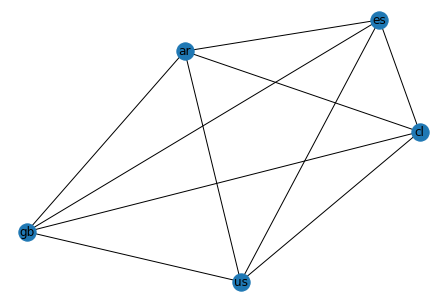

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

G=nx.Graph()


existing_nodes = []
existing_edges = []
def build_graph_for_all():
    count=0
    for d in corr_data:
        if  d[0] not in existing_edges :
             G.add_node(str(d[0]))
             existing_nodes.append(str(d[0]))
        if  d[1] not in existing_edges :     
             G.add_node(str(d[1]))
             existing_nodes.append(str(d[1]))

        if d[0] != d[1] and not (((d[0], d[1]) in existing_edges) or ((d[1], d[0]) in existing_edges)):
            print([[str(d[0]), str(d[1]),d[2]]])
            existing_edges.append((d[0], d[1]))
            G.add_weighted_edges_from([[str(d[0]), str(d[1]), d[2]]]) 


build_graph_for_all()

pos = nx.spring_layout(G, weight='weight')
nx.draw(G, pos=pos, width=1, with_labels=True)

plt.savefig("path1.png")


#nt = Network("500px", "500px")
#nt.from_nx(nx)
#nt.show("nx.html")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=926d8467-8a30-4d4c-b251-4ee95ec8dcff' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>